In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from numpy import arange
from numpy import argmax
import xgboost
from sklearn.metrics import precision_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from numpy import arange
from sklearn.metrics import accuracy_score
import copy
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from numpy import argmax
from sklearn import metrics
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import scipy.stats as ss
import itertools
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import scipy
import numpy as np, scipy.stats as st
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from scipy import interp
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.under_sampling import ClusterCentroids 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from sklearn.linear_model import Perceptron

from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import     OneSidedSelection 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SVMSMOTE
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
import itertools
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import matthews_corrcoef
import random
import pymrmr
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import *
from yellowbrick.model_selection import rfecv
from collections import defaultdict



##### Do not use any sampling technique to balance the dataset - its already balanced (more or less). Repeatedly split the dataset into train and test and select top features using RFECV. Then use the test set to tune hyperparameters - find the best classifier and threshold. Then take the best model for the internal validation test set and apply it on 20271 and 20194. Try ensemble models also

In [2]:
scorer = make_scorer(matthews_corrcoef)
def model_tune_nb(X_samp, y_samp):
    nb = GaussianNB()
    grid_params = [{'var_smoothing': [1e-11, 1e-10, 1e-9]}]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=nb, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_lda(X_samp, y_samp):
    lda = QuadraticDiscriminantAnalysis()
    #grid_params = [{'solver' : ['svd', 'lsqr', 'eigen']}]
    grid_params = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=lda, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_svm(X_samp, y_samp):
    svm = SVC(random_state=42, probability=True, class_weight="balanced")
    grid_params= [
                  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                 ]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=svm, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_knn(X_samp, y_samp):
    knn=KNeighborsClassifier()
    grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=knn, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_logreg(X_samp, y_samp):
    logreg = LogisticRegression(class_weight="balanced", random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    clf = GridSearchCV(estimator=logreg, param_grid=grid, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp,y_samp)
    return best_model,clf.best_score_

def model_tune_brf(X_samp, y_samp):
    brf=BalancedRandomForestClassifier(random_state=42, class_weight="balanced")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_params= { 
        'n_estimators':[10,20,21,30,50,100,200,500],
        'max_depth':[2,4,6,8,10],
                   'max_features': ['sqrt', 'log2'],
        'max_depth' : [2,3,5,7,9,11,13,15,17,19,21],
        'min_samples_leaf': [1,3,5],
        'min_samples_split': [2, 5,10,12],
    }
    clf = GridSearchCV(estimator=brf, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    print(clf.best_params_)
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_


def model_tune_ee(X_samp, y_samp):
    ee=EasyEnsembleClassifier(random_state=42)
    grid_params= { 
        'n_estimators':[10,20,21,30,50,100,200,500],
        }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=ee, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_


def model_tune_bagging(X_samp, y_samp):
    ee=BalancedBaggingClassifier(random_state=42)
    grid_params= { 
        'n_estimators':[10,20,21,30,50,100,200,500],'max_samples' : [0.05, 0.1, 0.2, 0.5],
        }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=ee, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_dt(X_samp, y_samp):
    dt=DecisionTreeClassifier(random_state=42, class_weight="balanced")
    grid_params = {'max_depth':[2,4,6,8,10,12],
                   'min_samples_split' :np.linspace(0.1, 1.0, 10, endpoint=True),
                   'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                   'max_features' :[None, 'sqrt', 'log2'],
                   'criterion': ["gini", "entropy"]}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=dt, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_rf(X_samp, y_samp):
    rf=RandomForestClassifier(random_state=42, class_weight="balanced")
    grid_params= { 
        'n_estimators':[10,20,21,30,50,100,200,500],
        'max_depth':[2,4,6,8,10],
                   'max_features': ['sqrt', 'log2'],
        'max_depth' : [2,3,5,7,9,11,13,15,17,19,21],
        'min_samples_leaf': [1,3,5],
        'min_samples_split': [2, 5,10,12],
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=rf, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_et(X_samp, y_samp):
    rf=ExtraTreesClassifier(random_state=42, class_weight="balanced")
    grid_params= { 
        'n_estimators':[5,10,20,21,30,50,100,200,500],
        'max_depth':[2,4,6,8,10],
                   'max_features': ['sqrt', 'log2'],
        'max_depth' : [2,3,5,7,9,11,13,15,17,19,21],
        'min_samples_leaf': [1,3,5],
        'min_samples_split': [2, 5,10,12],
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=rf, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model,clf.best_score_

def model_tune_ada(X_samp, y_samp):
    rf=AdaBoostClassifier(random_state=42)
    grid_params= {
        'n_estimators':[5,10,20,21,30,50,100,200,500],
        'learning_rate':[0.1,0.3,0.5,1,3,5,7,9],
        'algorithm':['SAMME', 'SAMME.R']
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    clf = GridSearchCV(estimator=rf, param_grid=grid_params, scoring=scorer, cv=cv, 
                               refit=True, return_train_score=True, n_jobs=100)
    clf.fit(X_samp,y_samp)
    print("Tuning Done")
    best_model = clf.best_estimator_
    best_model.fit(X_samp, y_samp)
    return best_model, clf.best_score_

def convert_to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [3]:
import pandas as pd

# Load training data with a relative path
train_data = pd.read_table("data/GSE25066/GSE25066_processed.txt")

# Convert labels to categorical codes
train_labs = train_data["Labels"].astype("category").cat.codes

# Drop the "Labels" column
train_data = train_data.drop("Labels", axis=1)

# Load top features using a relative path
top_feats = pd.read_table("data/Top_features/top_feats_TILs_pooled_sig_list.txt")

# Select only top features from the training data
train_data_feats = train_data[top_feats["Genes"]]

# Print the shape of the filtered data
print(train_data_feats.shape)


(170, 61)


In [4]:
from random import Random

def rfecv_ranked_list_generator(classifier_name, X, y, num_splits,num_repeats):
    rskf=RepeatedStratifiedKFold(n_splits=num_splits,n_repeats=num_repeats,random_state=42); my_dict = {}; num_feats =[]
    i=0; cols =[];auc=[];sensitivity=[];specificity=[];m=[];accuracy=[];cols=[]
    #X=train_data_feats; y=train_labs; 
    min_features_to_select = 1  # Minimum number of features to consider

    if classifier_name == "RF":
        clf = RandomForestClassifier(random_state=42)
    elif classifier_name == "Logit":
        clf = LogisticRegression(random_state=42)
    elif classifier_name == "SVM":
        clf = SVC(kernel="linear", random_state=42)

    for train_index,test_index in rskf.split(X,y):
        i=i+1
        print(i,end="")
        X_train,X_test=X.iloc[train_index],X.iloc[test_index]
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
        cv = StratifiedKFold(5); 
        rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring=make_scorer(matthews_corrcoef),min_features_to_select=min_features_to_select,
        n_jobs=-1,
    )
        rfecv.fit(X_train, y_train)

        my_dict[f'list_{i}'] = X_train.columns[rfecv.support_]
        num_feats.append(rfecv.n_features_)


    element_counts = Counter()

    # Iterate through each list in the dictionary and update the element counts
    for lst in my_dict.values():
        element_counts.update(lst)

    # Sort the elements based on their counts in descending order
    ranked_list = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)

    # Print the ranked list
    runs = num_splits * num_repeats
    print("\nRanked list of element counts:")
    for element, count in ranked_list:
        print(f"{element}: {count/runs}")

    n_scores = len(rfecv.cv_results_["mean_test_score"])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test mcc")
    plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],)
    plt.title("Recursive Feature Elimination")
    plt.show()

    return ranked_list

In [ ]:
#recursive feature elimintion with 5-fold CV ran 100 times resulting in 500 unique train-test splits

ranked_list_rf = rfecv_ranked_list_generator("RF",train_data_feats, train_labs, 5, 100) 
ranked_list_logreg = rfecv_ranked_list_generator("Logit",train_data_feats, train_labs, 5, 100)
ranked_list_svm = rfecv_ranked_list_generator("SVM",train_data_feats, train_labs, 5, 100)

In [ ]:
from collections import Counter

def ranked_element_counts(dictionary):
    # Initialize a Counter to store element counts
    element_counts = Counter()

    # Iterate through each list in the dictionary and update the element counts
    for lst in dictionary.values():
        element_counts.update(lst)

    # Sort the elements based on their counts in descending order
    ranked_list = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)

    return ranked_list

ranked_list = ranked_element_counts(my_dict)

# Print the ranked list
print("Ranked list of element counts:")
for element, count in ranked_list:
    print(f"{element}: {count/200}")

In [457]:
from os import name
#ranked_list_rf = pd.read_table('ranked_list_rf.txt')
ranked_list_logreg_1 = [item[0] for item in ranked_list_lr]
ranked_list_svm_1 = [item[0] for item in ranked_list_svm]



In [449]:
from collections import defaultdict

def combine_rankings(list_of_lists):
    # Initialize dictionary to store total points for each gene
    points = defaultdict(int)
    num_genes = len(list_of_lists[0])

    # Assign points based on rank in each list using Borda Count
    for ranked_list in list_of_lists:
        for rank, gene in enumerate(ranked_list, 1):
            points[gene] += num_genes - rank

    # Sort genes based on total points
    combined_ranking = sorted(points.items(), key=lambda x: x[1], reverse=True)
    return combined_ranking

In [ ]:
ranked_list_rf_1 = [item[0] for item in ranked_list_rf]
ranked_list_logreg_1 = [item[0] for item in ranked_list_logreg]
ranked_list_svm_1 = [item[0] for item in ranked_list_svm]
rankings = [ranked_list_rf_1, ranked_list_logreg_1, ranked_list_svm_1]
final_ranking = combine_rankings(rankings)

In [402]:
meta_rank = [item[0] for item in final_ranking]
meta_rank[0:30]



['S100B',
 'NOL7',
 'ILF2',
 'HAT1',
 'FBXO16',
 'LYPLA1',
 'TMEM14B',
 'PDCL3',
 'S100P',
 'DKK3',
 'PTPRC',
 'GREM1',
 'PTH2R',
 'CSN3',
 'SAA1',
 'NOP10',
 'TUBB6',
 'PRNP',
 'SEC13',
 'NME2',
 'ACTA2',
 'NDP',
 'DNAJC12',
 'GPNMB',
 'NPY1R',
 'HLA-DPA1',
 'BTG3',
 'TFF3',
 'SLC35B1',
 'H2AFV']

Since I have found the ranked list if features, I will now tune my hyperparameters on the test set that has been set aside 

Tuning hyperparameters

In [7]:
top_feats_after_rfecv = ['S100B', 'NOL7', 'ILF2', 'HAT1', 'FBXO16', 'LYPLA1', 'TMEM14B', 'PDCL3', 'S100P', 'DKK3', 'PTPRC', 'GREM1', 'PTH2R', 'CSN3', 'SAA1', 'NOP10', 'TUBB6', 'PRNP', 'SEC13', 'NME2', 'ACTA2', 'NDP', 'DNAJC12', 'GPNMB', 'NPY1R', 'HLA-DPA1', 'BTG3', 'TFF3', 'SLC35B1', 'H2AFV']

In [ ]:
#generating internal validation results 

auroc=[];  df= pd.DataFrame(); mcc_scorer = make_scorer(matthews_corrcoef);
sampling_names = ["RUS", "REDN", "CC", "IHT", "NearMiss", "EDN", "Tomek", "Allknn","CondensedNN", "OSS", "SMOTE", "ROS", "ADASYN", "KmeansSmote", "BorderlineSmote", "SVMSmote"]
#sampling_names = ["SMOTE"]
#sampling_techniuqes=[SMOTE(random_state=42)]
sampling_techniuqes = [RandomUnderSampler(random_state=42), RepeatedEditedNearestNeighbours(), ClusterCentroids(random_state=42), InstanceHardnessThreshold(random_state=42), NearMiss(), EditedNearestNeighbours(), TomekLinks(), AllKNN(), CondensedNearestNeighbour(random_state=42), OneSidedSelection(random_state=42), SMOTE(random_state=42), RandomOverSampler(random_state=42), ADASYN(random_state=42), KMeansSMOTE(random_state=42),BorderlineSMOTE(random_state=42), SVMSMOTE(random_state=42)]
classifier_names = ["BRF", "EE", "Bagging", "RF", "ADA", "ET","LOGREG","DT", "LDA", "KNN", "NB", "SVM"]; 
model =[]
#classifier_names = ['RF']
model_index = 0
#feats = list(range(20,28)); 
feats = [14,15,16,17,18,19,20]; auroc=[]

for n in range(0,len(feats)): 
    print("For ",feats[n]," genes: ") 
    #subsetiing n+1 genes and sampling technique -> REDN 
    X_train_sel = train_data_feats[top_feats_after_rfecv[0:feats[n]]]
    print(X_train_sel.shape)
    scaler = [MinMaxScaler()]
    scaler_names = ["minmax"]
             
    for s in range(0, len(scaler)):
        print("Scaling scheme:", scaler_names[s])
        for samp in range(0,len(sampling_techniuqes)):
            print("Scaling: ", scaler_names[s])
            X_train_sel = pd.DataFrame(scaler[s].fit_transform(X_train_sel),columns = X_train_sel.columns)
            #X_samp = X_train_sel; y_samp = train_labs
            X_samp, y_samp=sampling_techniuqes[samp].fit_resample(X_train_sel,train_labs)
            X_samp = pd.DataFrame(X_samp, columns = X_train_sel.columns)

            for c in classifier_names:
                name_id = sampling_names[samp]+ "_" + scaler_names[s]+ "_" + c + "_" + str(feats[n])

                model_index = 0;  mcc_overall =[]; thres = []; auc_overall = []
                if c == "RF":
                    mod,score = model_tune_rf(X_samp, y_samp)
                elif c == "LOGREG":
                    mod,score = model_tune_logreg(X_samp, y_samp)
                elif c == "DT":
                    mod,score = model_tune_dt(X_samp, y_samp)
                elif c == "ET":
                    mod,score = model_tune_et(X_samp, y_samp)
                elif c == "ADA":
                    mod,score = model_tune_ada(X_samp, y_samp)
                elif c == "LDA":
                    mod,score = model_tune_lda(X_samp, y_samp)
                elif c == "KNN":
                    mod,score = model_tune_knn(X_samp, y_samp)
                elif c == "NB":
                    mod,score = model_tune_nb(X_samp, y_samp)
                elif c == "SVM":
                    mod,score = model_tune_svm(X_samp,y_samp)
                elif c == "BRF":
                    mod,score = model_tune_brf(X_samp,y_samp)
                elif c == "EE":
                    mod,score = model_tune_ee(X_samp, y_samp)
                elif c == "Bagging":
                    mod,score = model_tune_bagging(X_samp, y_samp)
                

                l=[score, c, feats[n], sampling_names[samp]]
                row=pd.Series(l,['mcc_score','classifier','num_feats',"sampling_names"])
                df=df.append([row],ignore_index=True)
                print(df)
                model.append(mod)
                model_index+=1

In [7]:
df_internal_validation = pd.read_csv('/home/shayantan/TNBC-single-cell/Reproducibility_best_results/consolidated_results_internal_validation.csv')
df_internal_validation.columns = ['Model_index','mcc_score','classifier','num_feats','sampling_names']
df_internal_validation[0:10]

,Model_index,mcc_score,classifier,num_feats,sampling_names
0,616,0.855828,ADA,17,IHT
1,808,0.855813,ADA,18,IHT
2,431,0.853170,SVM,16,IHT
3,473,0.850131,ET,16,Allknn
4,713,0.844225,ET,17,ROS
5,425,0.839603,ET,16,IHT
6,893,0.839275,ET,18,SMOTE
7,617,0.838844,ET,17,IHT
8,476,0.837515,LDA,16,Allknn
9,613,0.836369,EE,17,IHT


In [420]:
import pickle
with open('/home/shayantan/TNBC-single-cell/Reproducibility_best_results/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [5]:
from pandas import read_pickle
import pickle


model_gene_only = read_pickle('/home/shayantan/TNBC-single-cell/Reproducibility_best_results/model.pkl')

Now I have found out the best classifiers from the training data using cross-validation. Time to test it using GSE Ids- 20271,20194,31519,106977

In [8]:
feats = [20]; sc = MinMaxScaler()
X_train_sel = train_data_feats[top_feats_after_rfecv[0:feats[0]]]
X_train_sel = pd.DataFrame(sc.fit_transform(X_train_sel),columns = X_train_sel.columns)

val_data = pd.read_table('/home/shayantan/TNBC-single-cell/TNBC-archive/batch_corrected_validation_20271_20194_31519_dataset_combined.txt')
val_labs_20271_20194_31519 =val_data['Labels'].astype('category').cat.codes
val_data=val_data.drop('Labels', axis=1)
val_data_feats_20271_20194_31519 = val_data[top_feats_after_rfecv[0:feats[0]]]
val_data_feats_20271_20194_31519 = pd.DataFrame(sc.transform(val_data_feats_20271_20194_31519),columns = val_data_feats_20271_20194_31519.columns)


val_data = pd.read_table('/home/shayantan/TNBC-single-cell/TNBC-archive/GSE106977/GSE106977_processed.txt')
val_labs_106977 =val_data['Labels'].astype('category').cat.codes
val_data=val_data.drop('Labels', axis=1)
val_data_feats_106977 = val_data[top_feats_after_rfecv[0:feats[0]]]
val_data_feats_106977 = pd.DataFrame(sc.transform(val_data_feats_106977),columns = val_data_feats_106977.columns)

class_names = ['ExtraTreesClassifier']
test_data = [val_data_feats_20271_20194_31519, val_data_feats_106977]
test_labs = [val_labs_20271_20194_31519, val_labs_106977]
test_names = ['20271_20194_31519','106977']

classifiers = [model_gene_only[713]]

In [11]:
df_results = pd.DataFrame();preds=[];probs=[]
for i in range(0,2):
    for j in range(0,1):
        y_test_predictions, y_probs, sen, spe, auprc, acc, auc, mcc, f1, thresh = print_metrics_with_threshold_tuning(class_names, test_data[i], test_labs[i], top_feats_after_rfecv[0:17], classifiers[j])
        name = class_names[j] + "_" + test_names[i] +"_"+ str(np.round(thresh,3))
        preds.append(y_test_predictions);probs.append(y_probs)
        l=[sen, spe, auprc, acc, auc, mcc, f1, name]
        row=pd.Series(l,['Sensitivity', 'Specificity','AUPRC','Balanced_accuracy','AUROC', 'MCC', 'Weighted-f1', 'name'])
        df_results=df_results.append([row],ignore_index=True)
        

Threshold:  0.53
              precision    recall  f1-score   support

           0       0.80      0.53      0.63        74
           1       0.76      0.92      0.83       120

    accuracy                           0.77       194
   macro avg       0.78      0.72      0.73       194
weighted avg       0.77      0.77      0.76       194

Name:  ['ExtraTreesClassifier'] Sensitivity:  0.917 , Specificity:  0.527 AUPRC:  0.747 , AUROC:  0.782 , MCC:  0.496  , F1-weighted:  0.755
Threshold:  0.531
              precision    recall  f1-score   support

           0       0.51      0.61      0.55        46
           1       0.72      0.63      0.67        73

    accuracy                           0.62       119
   macro avg       0.61      0.62      0.61       119
weighted avg       0.64      0.62      0.63       119

Name:  ['ExtraTreesClassifier'] Sensitivity:  0.63 , Specificity:  0.609 AUPRC:  0.68 , AUROC:  0.666 , MCC:  0.233  , F1-weighted:  0.626


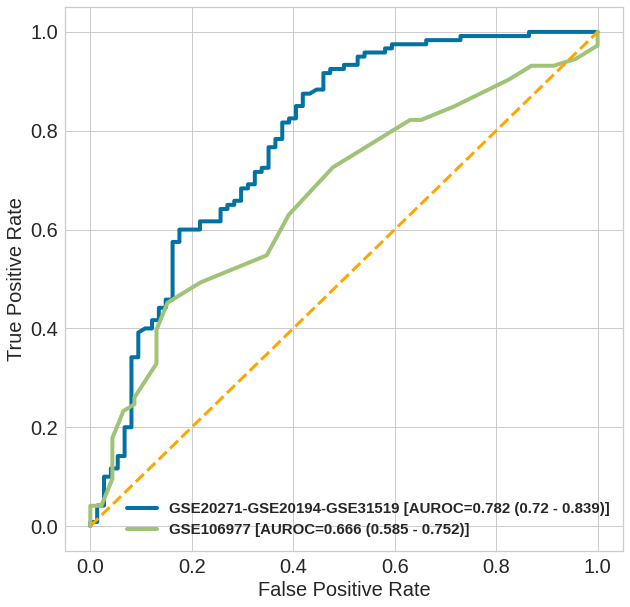

In [14]:
plt.figure(figsize=(10, 10)) 
draw_roc(val_labs_20271_20194_31519, probs[0], index = 0) 
draw_roc(val_labs_106977, probs[1], index = 1) 

plt.plot([0,1], [0,1], color='orange', linestyle='--', linewidth = 3)

plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize = 20)
plt.xlabel("False Positive Rate", fontsize = 20)

plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize = 20)
plt.ylabel("True Positive Rate", fontsize = 20)

    #plt.title('ROC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':15, 'weight':'bold'}, loc='lower right')
plt.savefig('/home/shayantan/TNBC-single-cell/Reproducibility_best_results/ROC_plot_external_validation.pdf')
plt.show()


In [ ]:
plt.figure(figsize=(10, 10)) 
draw_prc(val_labs_20271_20194_31519, probs[0], index = 0) 
draw_prc(val_labs_106977, probs[1], index = 1) 

plt.xticks(np.arange(0.0, 1, step=0.3), fontsize = 20)
plt.xlabel("Recall", fontsize = 20)

plt.yticks(np.arange(0.0, 1, step=0.3), fontsize = 20)
plt.ylabel("Precision", fontsize = 20)

    #plt.title('ROC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':15, 'weight':'bold'}, loc='lower right')
plt.savefig('/home/shayantan/TNBC-single-cell/Reproducibility_best_results/PRC_plot_external_validation.pdf')
plt.show()


In [13]:
def draw_roc(y_test, y_probs, index):
    names = ['GSE20271-GSE20194-GSE31519','GSE106977']

    fp_rate, tp_rate, thresh = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    rng = np.random.RandomState(rng_seed)

    for k in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_probs), len(y_probs))
        if len(np.unique(y_test[indices])) < 2:
            continue
        score = roc_auc_score(y_test[indices], y_probs[indices])
        bootstrapped_scores.append(score)
                #print("Bootstrap #{} ROC area: {:0.3f}".format(k + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    plt.plot(fp_rate, tp_rate, label=names[index]+" [AUROC=" +str(round(auc,3)) + 
                     " ("+ str(round(confidence_lower,3))+" - "+str(round(confidence_upper,3))+")]", linewidth = 4)

In [112]:
from sklearn.metrics import average_precision_score, precision_recall_curve


def draw_prc(y_test, y_probs, index):
    names = ['GSE20271-GSE20194-GSE31519','GSE106977']

    precision, recall, thresh = precision_recall_curve(y_test, y_probs)
    auprc = metrics.auc(recall, precision)
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    rng = np.random.RandomState(rng_seed)

    for k in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_probs), len(y_probs))
        if len(np.unique(y_test[indices])) < 2:
            continue
        score = average_precision_score(y_test[indices], y_probs[indices])
        bootstrapped_scores.append(score)
                #print("Bootstrap #{} ROC area: {:0.3f}".format(k + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    plt.plot(recall, precision, label=names[index]+" [AUPRC: " +str(round(auprc,3)) + " ("+ str(round(confidence_lower,3))+" - "+str(round(confidence_upper,3))+")]", linewidth = 4)

Integrated model

In [492]:
from sklearn.preprocessing import LabelEncoder

In [16]:
#TNBC_subtype + purity + enrichment scores - training data
val_data_feats_25066_subtype_xcell_estimate = pd.read_table("/home/shayantan/TNBC-single-cell/Reproducibility_best_results/TNBC_subtype_Cell_enrichment/GSE25066_processed_tnbc_type_xcell_estimate.txt")
cols = top_feats_after_rfecv[0:17] + ["B-cells","CD4+ T-cells","CD4+ Tcm", "CD4+ Tem","CD4+ memory T-cells", "CD4+ naive T-cells","CD8+ T-cells","CD8+ Tcm","CD8+ Tem","CD8+ naive T-cells","Memory B-cells","naive B-cells", "pro B-cells","Tregs", "ImmuneScore","StromaScore", "MicroenvironmentScore"]
numeric_cols = top_feats_after_rfecv[0:17] + ["B-cells","CD4+ T-cells","CD4+ Tcm", "CD4+ Tem","CD4+ memory T-cells", "CD4+ naive T-cells","CD8+ T-cells","CD8+ Tcm","CD8+ Tem","CD8+ naive T-cells","Memory B-cells","naive B-cells", "pro B-cells","Tregs", "ImmuneScore","StromaScore", "MicroenvironmentScore"]
val_data_feats_25066_subtype_xcell_estimate = val_data_feats_25066_subtype_xcell_estimate[cols]
#le = LabelEncoder()
#le.fit(val_data_feats_25066_subtype_xcell_estimate['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate['TNBC_type'] = le.transform(val_data_feats_25066_subtype_xcell_estimate['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate_encoded = pd.get_dummies(val_data_feats_25066_subtype_xcell_estimate, columns=['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate_encoded = (val_data_feats_25066_subtype_xcell_estimate, columns=['TNBC_type'])
sc = MinMaxScaler(); val_data_feats_25066_subtype_xcell_estimate_encoded = val_data_feats_25066_subtype_xcell_estimate
val_data_feats_25066_subtype_xcell_estimate_encoded[numeric_cols] = sc.fit_transform(val_data_feats_25066_subtype_xcell_estimate_encoded[numeric_cols])
val_data_feats_25066_subtype_xcell_estimate_encoded = pd.DataFrame(val_data_feats_25066_subtype_xcell_estimate_encoded, columns = val_data_feats_25066_subtype_xcell_estimate_encoded.columns)
print(val_data_feats_25066_subtype_xcell_estimate_encoded.columns)


Index(['S100B', 'NOL7', 'ILF2', 'HAT1', 'FBXO16', 'LYPLA1', 'TMEM14B', 'PDCL3',
       'S100P', 'DKK3', 'PTPRC', 'GREM1', 'PTH2R', 'CSN3', 'SAA1', 'NOP10',
       'TUBB6', 'B-cells', 'CD4+ T-cells', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ memory T-cells', 'CD4+ naive T-cells', 'CD8+ T-cells', 'CD8+ Tcm',
       'CD8+ Tem', 'CD8+ naive T-cells', 'Memory B-cells', 'naive B-cells',
       'pro B-cells', 'Tregs', 'ImmuneScore', 'StromaScore',
       'MicroenvironmentScore'],
      dtype='object')


In [17]:
#TNBC_subtype + purity + enrichment scores - training data
val_data_feats_combined_subtype_xcell_estimate = pd.read_table("/home/shayantan/TNBC-single-cell/Reproducibility_best_results/TNBC_subtype_Cell_enrichment/GSE20271_20194_31519_processed_tnbc_type_xcell_estimate.txt")
cols = top_feats_after_rfecv[0:17] + ["B-cells","CD4+ T-cells","CD4+ Tcm", "CD4+ Tem","CD4+ memory T-cells", "CD4+ naive T-cells","CD8+ T-cells","CD8+ Tcm","CD8+ Tem","CD8+ naive T-cells","Memory B-cells","naive B-cells", "pro B-cells","Tregs", "ImmuneScore","StromaScore", "MicroenvironmentScore"]
numeric_cols = top_feats_after_rfecv[0:17] + ["B-cells","CD4+ T-cells","CD4+ Tcm", "CD4+ Tem","CD4+ memory T-cells", "CD4+ naive T-cells","CD8+ T-cells","CD8+ Tcm","CD8+ Tem","CD8+ naive T-cells","Memory B-cells","naive B-cells", "pro B-cells","Tregs", "ImmuneScore","StromaScore", "MicroenvironmentScore"]
val_data_feats_combined_subtype_xcell_estimate = val_data_feats_combined_subtype_xcell_estimate[cols]
#le = LabelEncoder()
#le.fit(val_data_feats_25066_subtype_xcell_estimate['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate['TNBC_type'] = le.transform(val_data_feats_25066_subtype_xcell_estimate['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate_encoded = pd.get_dummies(val_data_feats_25066_subtype_xcell_estimate, columns=['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate_encoded = (val_data_feats_25066_subtype_xcell_estimate, columns=['TNBC_type'])
sc = MinMaxScaler(); val_data_feats_combined_subtype_xcell_estimate_encoded = val_data_feats_combined_subtype_xcell_estimate
val_data_feats_combined_subtype_xcell_estimate_encoded[numeric_cols] = sc.fit_transform(val_data_feats_combined_subtype_xcell_estimate_encoded[numeric_cols])
val_data_feats_combined_subtype_xcell_estimate_encoded = pd.DataFrame(val_data_feats_combined_subtype_xcell_estimate_encoded, columns = val_data_feats_combined_subtype_xcell_estimate_encoded.columns)
print(val_data_feats_combined_subtype_xcell_estimate_encoded.columns)


Index(['S100B', 'NOL7', 'ILF2', 'HAT1', 'FBXO16', 'LYPLA1', 'TMEM14B', 'PDCL3',
       'S100P', 'DKK3', 'PTPRC', 'GREM1', 'PTH2R', 'CSN3', 'SAA1', 'NOP10',
       'TUBB6', 'B-cells', 'CD4+ T-cells', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ memory T-cells', 'CD4+ naive T-cells', 'CD8+ T-cells', 'CD8+ Tcm',
       'CD8+ Tem', 'CD8+ naive T-cells', 'Memory B-cells', 'naive B-cells',
       'pro B-cells', 'Tregs', 'ImmuneScore', 'StromaScore',
       'MicroenvironmentScore'],
      dtype='object')


In [18]:
#TNBC_subtype + purity + enrichment scores - training data
val_data_feats_106977_subtype_xcell_estimate = pd.read_table("/home/shayantan/TNBC-single-cell/Reproducibility_best_results/TNBC_subtype_Cell_enrichment/GSE106977_processed_data_tnbc_type_xcell_estimate.txt")
cols = top_feats_after_rfecv[0:17] + ["B-cells","CD4+ T-cells","CD4+ Tcm", "CD4+ Tem","CD4+ memory T-cells", "CD4+ naive T-cells","CD8+ T-cells","CD8+ Tcm","CD8+ Tem","CD8+ naive T-cells","Memory B-cells","naive B-cells", "pro B-cells","Tregs", "ImmuneScore","StromaScore", "MicroenvironmentScore"]
numeric_cols = top_feats_after_rfecv[0:17] + ["B-cells","CD4+ T-cells","CD4+ Tcm", "CD4+ Tem","CD4+ memory T-cells", "CD4+ naive T-cells","CD8+ T-cells","CD8+ Tcm","CD8+ Tem","CD8+ naive T-cells","Memory B-cells","naive B-cells", "pro B-cells","Tregs", "ImmuneScore","StromaScore", "MicroenvironmentScore"]
val_data_feats_106977_subtype_xcell_estimate = val_data_feats_106977_subtype_xcell_estimate[cols]
#le = LabelEncoder()
#le.fit(val_data_feats_25066_subtype_xcell_estimate['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate['TNBC_type'] = le.transform(val_data_feats_25066_subtype_xcell_estimate['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate_encoded = pd.get_dummies(val_data_feats_25066_subtype_xcell_estimate, columns=['TNBC_type'])
#val_data_feats_25066_subtype_xcell_estimate_encoded = (val_data_feats_25066_subtype_xcell_estimate, columns=['TNBC_type'])
sc = MinMaxScaler(); val_data_feats_106977_subtype_xcell_estimate_encoded = val_data_feats_106977_subtype_xcell_estimate
val_data_feats_106977_subtype_xcell_estimate_encoded[numeric_cols] = sc.fit_transform(val_data_feats_106977_subtype_xcell_estimate_encoded[numeric_cols])
val_data_feats_106977_subtype_xcell_estimate_encoded = pd.DataFrame(val_data_feats_106977_subtype_xcell_estimate_encoded, columns = val_data_feats_combined_subtype_xcell_estimate_encoded.columns)
print(val_data_feats_106977_subtype_xcell_estimate_encoded.columns)


Index(['S100B', 'NOL7', 'ILF2', 'HAT1', 'FBXO16', 'LYPLA1', 'TMEM14B', 'PDCL3',
       'S100P', 'DKK3', 'PTPRC', 'GREM1', 'PTH2R', 'CSN3', 'SAA1', 'NOP10',
       'TUBB6', 'B-cells', 'CD4+ T-cells', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ memory T-cells', 'CD4+ naive T-cells', 'CD8+ T-cells', 'CD8+ Tcm',
       'CD8+ Tem', 'CD8+ naive T-cells', 'Memory B-cells', 'naive B-cells',
       'pro B-cells', 'Tregs', 'ImmuneScore', 'StromaScore',
       'MicroenvironmentScore'],
      dtype='object')


In [19]:
val_data_feats_106977_subtype_xcell_estimate_encoded.columns

Index(['S100B', 'NOL7', 'ILF2', 'HAT1', 'FBXO16', 'LYPLA1', 'TMEM14B', 'PDCL3',
       'S100P', 'DKK3', 'PTPRC', 'GREM1', 'PTH2R', 'CSN3', 'SAA1', 'NOP10',
       'TUBB6', 'B-cells', 'CD4+ T-cells', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ memory T-cells', 'CD4+ naive T-cells', 'CD8+ T-cells', 'CD8+ Tcm',
       'CD8+ Tem', 'CD8+ naive T-cells', 'Memory B-cells', 'naive B-cells',
       'pro B-cells', 'Tregs', 'ImmuneScore', 'StromaScore',
       'MicroenvironmentScore'],
      dtype='object')

In [ ]:
auroc=[];  
df= pd.DataFrame(); 
mcc_scorer = make_scorer(matthews_corrcoef);
cols = top_feats_after_rfecv[0:17] + ['B-cells', 'CD4+ T-cells', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ memory T-cells', 'CD4+ naive T-cells', 'CD8+ T-cells', 'CD8+ Tcm',
       'CD8+ Tem', 'CD8+ naive T-cells', 'Memory B-cells', 'naive B-cells',
       'pro B-cells', 'Tregs', 'ImmuneScore', 'StromaScore',
       'MicroenvironmentScore']
sampling_names = ["RUS", "REDN", "CC", "IHT", "NearMiss", "EDN", "Tomek", "Allknn","CondensedNN", "OSS", "SMOTE", "ROS", "ADASYN", "KmeansSmote", "BorderlineSmote", "SVMSmote"]
#sampling_names = ["BorderlineSmote", "SVMSmote"]
sampling_techniuqes = [RepeatedEditedNearestNeighbours(), ClusterCentroids(random_state=42), InstanceHardnessThreshold(random_state=42), NearMiss(), EditedNearestNeighbours(), TomekLinks(), AllKNN(), CondensedNearestNeighbour(random_state=42), OneSidedSelection(random_state=42), SMOTE(random_state=42), RandomOverSampler(random_state=42), ADASYN(random_state=42), KMeansSMOTE(random_state=42),BorderlineSMOTE(random_state=42), SVMSMOTE(random_state=42)]
#sampling_techniuqes = [BorderlineSMOTE(random_state=42), SVMSMOTE(random_state=42)]
classifier_names = ["BRF", "EE", "Bagging", "RF", "ADA", "ET","LOGREG","DT", "LDA", "KNN", "NB", "SVM"]; 
model =[]
#classifier_names = ['ET']
model_index = 0
#feats = list(range(20,28)); 
feats = [len(cols)]; auroc=[]

for n in range(0,len(feats)): 
    print("For ",feats[n]," genes: ") 
    #subsetiing n+1 genes and sampling technique -> REDN 
    X_train_sel = val_data_feats_25066_subtype_xcell_estimate_encoded[cols]
    print(X_train_sel.shape)
    scaler = [MinMaxScaler()]
    scaler_names = ["minmax"]
             
    for s in range(0, len(scaler)):
        print("Scaling scheme:", scaler_names[s])
        for samp in range(0,len(sampling_techniuqes)):
            print("Scaling: ", scaler_names[s])
            X_train_sel = pd.DataFrame(scaler[s].fit_transform(X_train_sel),columns = X_train_sel.columns)
            #X_samp = X_train_sel; y_samp = train_labs
            X_samp, y_samp=sampling_techniuqes[samp].fit_resample(X_train_sel,train_labs)
            X_samp = pd.DataFrame(X_samp, columns = X_train_sel.columns)

            for c in classifier_names:
                name_id = sampling_names[samp]+ "_" + scaler_names[s]+ "_" + c + "_" + str(feats[n])

                model_index = 0;  mcc_overall =[]; thres = []; auc_overall = []
                if c == "RF":
                    mod,score = model_tune_rf(X_samp, y_samp)
                elif c == "LOGREG":
                    mod,score = model_tune_logreg(X_samp, y_samp)
                elif c == "DT":
                    mod,score = model_tune_dt(X_samp, y_samp)
                elif c == "ET":
                    mod,score = model_tune_et(X_samp, y_samp)
                elif c == "ADA":
                    mod,score = model_tune_ada(X_samp, y_samp)
                elif c == "LDA":
                    mod,score = model_tune_lda(X_samp, y_samp)
                elif c == "KNN":
                    mod,score = model_tune_knn(X_samp, y_samp)
                elif c == "NB":
                    mod,score = model_tune_nb(X_samp, y_samp)
                elif c == "SVM":
                    mod,score = model_tune_svm(X_samp,y_samp)
                elif c == "BRF":
                    mod,score = model_tune_brf(X_samp,y_samp)
                elif c == "EE":
                    mod,score = model_tune_ee(X_samp, y_samp)
                elif c == "Bagging":
                    mod,score = model_tune_bagging(X_samp, y_samp)

                # l=[score, c, feats[n]]
                # row=pd.Series(l,['mcc_score','classifier','num_feats'])
                # df=df.append([row],ignore_index=True)
                # print(df)
                print("GSE-combined")
                X_test=val_data_feats_combined_subtype_xcell_estimate_encoded[X_samp.columns]
                X_test = pd.DataFrame(scaler[s].transform(X_test),columns = X_test.columns)
                y_t, y_p, sen_c, spe_c, auprc_c, acc_c, auc_c, mcc_c, f1_c, t_c = print_metrics_with_threshold_tuning("GSE-combined", X_test, val_labs_20271_20194_31519, X_samp.columns, mod)
                l=[sen_c, spe_c, auprc_c, acc_c, auc_c, mcc_c, f1_c, "GSE-combined" + "_"+ str(t_c) + "_"+ name_id]
                row=pd.Series(l,['sen','spe','auprc','acc','auc', 'mcc', 'f1', 'ID'])
                df=df.append([row],ignore_index=True)
                print("GSE106977")
                X_test=val_data_feats_106977_subtype_xcell_estimate_encoded[X_samp.columns]
                X_test = pd.DataFrame(scaler[s].transform(X_test),columns = X_test.columns)
                y_t,y_p,sen_a, spe_a, auprc_a, acc_a, auc_a, mcc_a, f1_a, t_a = print_metrics_with_threshold_tuning("GSE106977", X_test, val_labs_106977, X_samp.columns, mod)
                l=[sen_a, spe_a, auprc_a, acc_a, auc_a, mcc_a, f1_a, "GSE106977" + "_"+ str(t_a)+"_"+name_id]
                row=pd.Series(l,['sen','spe','auprc','acc','auc', 'mcc', 'f1','ID'])
                df=df.append([row],ignore_index=True)
                df.to_csv("/home/shayantan/TNBC-single-cell/Reproducibility_best_results/17_gene_xcell.csv", header=True)

                print(df)

In [ ]:
print_metrics_with_threshold_tuning("ll",val_data_feats_20271_20194_31519,val_labs_20271_20194_31519,top_feats_after_rfecv[0:17],model_gene_only[713])

Permutation test for significance using the two independent test sets

In [74]:
#permutation test using the same sampling-classifier-num_feats configuration as the best results - ROS-ET-0.5
feats = [20]; sc = MinMaxScaler();
X_train_sel = train_data_feats[top_feats_after_rfecv[0:17]]
X_train_sel = pd.DataFrame(sc.fit_transform(X_train_sel),columns = X_train_sel.columns)
samp = RandomOverSampler(random_state=42)
X_samp, y_samp=samp.fit_resample(X_train_sel,train_labs)
X_samp = pd.DataFrame(X_samp, columns = X_train_sel.columns)
X_test = val_data_feats_106977[top_feats_after_rfecv[0:17]]; y_test = val_labs_106977


# Permutation test or the resampling test.
permuted_accuracies = []; p_sen=[];p_spe=[];p_auroc=[];p_auprc=[];p_mcc=[];p_f1=[]
permutation_iters = 100 # We run the procedure many times to have a 'good enough' estimate of the accuracy of a chance model.
for i in range(permutation_iters):
    print(i)
    # Shuffle the dataset here so that the target species/labels are `randomly` assigned to the samples.
    np.random.shuffle(y_samp)
    
    # When we obtain train and test splits, the assignments are random.
    best_mod, b = model_tune_et(X_samp,y_samp)
    y_t, y_p, sen_c, spe_c, auprc_c, acc_c, auc_c, mcc_c, f1_c, t_c = print_metrics_with_threshold_tuning("permute",X_test,y_test,top_feats_after_rfecv[0:17],best_mod)
    p_sen.append(sen_c)
    p_spe.append(spe_c)
    p_auroc.append(auc_c)
    p_auprc.append(auprc_c)
    p_mcc.append(mcc_c)
    p_f1.append(f1_c)

0


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.851
Name:  permute Sensitivity:  1.0 , Specificity:  0.0 AUPRC:  0.613 , AUROC:  0.623 , MCC:  0.0  , F1-weighted:  0.466
1


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.592
Name:  permute Sensitivity:  0.904 , Specificity:  0.109 AUPRC:  0.616 , AUROC:  0.605 , MCC:  0.021  , F1-weighted:  0.517
2


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.446
Name:  permute Sensitivity:  0.315 , Specificity:  0.783 AUPRC:  0.64 , AUROC:  0.555 , MCC:  0.106  , F1-weighted:  0.477
3


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.7000000000000001
Name:  permute Sensitivity:  0.658 , Specificity:  0.196 AUPRC:  0.581 , AUROC:  0.403 , MCC:  -0.158  , F1-weighted:  0.46
4


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.601
Name:  permute Sensitivity:  0.192 , Specificity:  0.717 AUPRC:  0.595 , AUROC:  0.455 , MCC:  -0.106  , F1-weighted:  0.357
5


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.661
Name:  permute Sensitivity:  0.534 , Specificity:  0.435 AUPRC:  0.606 , AUROC:  0.392 , MCC:  -0.03  , F1-weighted:  0.501
6


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.298
Name:  permute Sensitivity:  0.123 , Specificity:  0.913 AUPRC:  0.623 , AUROC:  0.551 , MCC:  0.057  , F1-weighted:  0.342
7


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.442
Name:  permute Sensitivity:  0.493 , Specificity:  0.63 AUPRC:  0.646 , AUROC:  0.564 , MCC:  0.121  , F1-weighted:  0.551
8


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.634
Name:  permute Sensitivity:  0.959 , Specificity:  0.065 AUPRC:  0.619 , AUROC:  0.567 , MCC:  0.054  , F1-weighted:  0.506
9


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.454
Name:  permute Sensitivity:  0.411 , Specificity:  0.761 AUPRC:  0.662 , AUROC:  0.615 , MCC:  0.176  , F1-weighted:  0.541
10


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.417
Name:  permute Sensitivity:  0.274 , Specificity:  0.826 AUPRC:  0.641 , AUROC:  0.572 , MCC:  0.115  , F1-weighted:  0.457
11


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.528
Name:  permute Sensitivity:  0.274 , Specificity:  0.761 AUPRC:  0.622 , AUROC:  0.544 , MCC:  0.039  , F1-weighted:  0.438
12


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.736
Name:  permute Sensitivity:  0.425 , Specificity:  0.435 AUPRC:  0.584 , AUROC:  0.404 , MCC:  -0.137  , F1-weighted:  0.436
13


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.794
Name:  permute Sensitivity:  0.753 , Specificity:  0.109 AUPRC:  0.583 , AUROC:  0.366 , MCC:  -0.17  , F1-weighted:  0.455
14


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.484
Name:  permute Sensitivity:  0.904 , Specificity:  0.087 AUPRC:  0.611 , AUROC:  0.438 , MCC:  -0.015  , F1-weighted:  0.502
15


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.47500000000000003
Name:  permute Sensitivity:  0.137 , Specificity:  0.935 AUPRC:  0.635 , AUROC:  0.552 , MCC:  0.112  , F1-weighted:  0.361
16


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.463
Name:  permute Sensitivity:  0.0 , Specificity:  0.891 AUPRC:  0.613 , AUROC:  0.491 , MCC:  -0.264  , F1-weighted:  0.198
17


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.0
Name:  permute Sensitivity:  0.973 , Specificity:  0.0 AUPRC:  0.607 , AUROC:  0.339 , MCC:  -0.104  , F1-weighted:  0.458
18


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.457
Name:  permute Sensitivity:  0.849 , Specificity:  0.13 AUPRC:  0.609 , AUROC:  0.44 , MCC:  -0.028  , F1-weighted:  0.508
19


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.0
Name:  permute Sensitivity:  0.945 , Specificity:  0.022 AUPRC:  0.606 , AUROC:  0.391 , MCC:  -0.08  , F1-weighted:  0.468
20


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.47900000000000004
Name:  permute Sensitivity:  0.685 , Specificity:  0.283 AUPRC:  0.606 , AUROC:  0.443 , MCC:  -0.034  , F1-weighted:  0.516
21


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.358
Name:  permute Sensitivity:  0.014 , Specificity:  1.0 AUPRC:  0.619 , AUROC:  0.51 , MCC:  0.073  , F1-weighted:  0.233
22


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.253
Name:  permute Sensitivity:  0.123 , Specificity:  0.913 AUPRC:  0.623 , AUROC:  0.624 , MCC:  0.057  , F1-weighted:  0.342
23


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.434
Name:  permute Sensitivity:  0.425 , Specificity:  0.674 AUPRC:  0.639 , AUROC:  0.596 , MCC:  0.099  , F1-weighted:  0.521
24


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.45
Name:  permute Sensitivity:  0.0 , Specificity:  1.0 AUPRC:  0.613 , AUROC:  0.455 , MCC:  0.0  , F1-weighted:  0.216
25


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.419
Name:  permute Sensitivity:  0.027 , Specificity:  0.978 AUPRC:  0.615 , AUROC:  0.588 , MCC:  0.018  , F1-weighted:  0.247
26


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.42
Name:  permute Sensitivity:  0.0 , Specificity:  0.978 AUPRC:  0.613 , AUROC:  0.425 , MCC:  -0.116  , F1-weighted:  0.212
27


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.751
Name:  permute Sensitivity:  0.89 , Specificity:  0.109 AUPRC:  0.613 , AUROC:  0.51 , MCC:  -0.001  , F1-weighted:  0.511
28


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.506
Name:  permute Sensitivity:  0.822 , Specificity:  0.174 AUPRC:  0.612 , AUROC:  0.499 , MCC:  -0.005  , F1-weighted:  0.523
29


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.401
Name:  permute Sensitivity:  0.411 , Specificity:  0.63 AUPRC:  0.624 , AUROC:  0.558 , MCC:  0.041  , F1-weighted:  0.497
30


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.309
Name:  permute Sensitivity:  0.0 , Specificity:  1.0 AUPRC:  0.613 , AUROC:  0.483 , MCC:  0.0  , F1-weighted:  0.216
31


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.497
Name:  permute Sensitivity:  0.795 , Specificity:  0.348 AUPRC:  0.65 , AUROC:  0.554 , MCC:  0.158  , F1-weighted:  0.603
32


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.621
Name:  permute Sensitivity:  0.534 , Specificity:  0.348 AUPRC:  0.588 , AUROC:  0.453 , MCC:  -0.116  , F1-weighted:  0.466
33


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.531
Name:  permute Sensitivity:  0.795 , Specificity:  0.37 AUPRC:  0.656 , AUROC:  0.625 , MCC:  0.18  , F1-weighted:  0.613
34


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.397
Name:  permute Sensitivity:  0.178 , Specificity:  0.739 AUPRC:  0.597 , AUROC:  0.449 , MCC:  -0.099  , F1-weighted:  0.351
35


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.41600000000000004
Name:  permute Sensitivity:  0.192 , Specificity:  0.826 AUPRC:  0.618 , AUROC:  0.495 , MCC:  0.022  , F1-weighted:  0.386
36


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.486
Name:  permute Sensitivity:  0.137 , Specificity:  0.891 AUPRC:  0.621 , AUROC:  0.475 , MCC:  0.042  , F1-weighted:  0.351
37


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.502
Name:  permute Sensitivity:  0.164 , Specificity:  0.913 AUPRC:  0.636 , AUROC:  0.492 , MCC:  0.111  , F1-weighted:  0.383
38


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.47500000000000003
Name:  permute Sensitivity:  0.288 , Specificity:  0.739 AUPRC:  0.62 , AUROC:  0.527 , MCC:  0.029  , F1-weighted:  0.442
39


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.28200000000000003
Name:  permute Sensitivity:  0.055 , Specificity:  0.978 AUPRC:  0.624 , AUROC:  0.567 , MCC:  0.08  , F1-weighted:  0.28
40


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.65
Name:  permute Sensitivity:  0.685 , Specificity:  0.239 AUPRC:  0.596 , AUROC:  0.479 , MCC:  -0.082  , F1-weighted:  0.495
41


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.225
Name:  permute Sensitivity:  0.0 , Specificity:  1.0 AUPRC:  0.613 , AUROC:  0.439 , MCC:  0.0  , F1-weighted:  0.216
42


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.555
Name:  permute Sensitivity:  0.699 , Specificity:  0.217 AUPRC:  0.594 , AUROC:  0.525 , MCC:  -0.092  , F1-weighted:  0.49
43


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.41300000000000003
Name:  permute Sensitivity:  0.603 , Specificity:  0.391 AUPRC:  0.612 , AUROC:  0.533 , MCC:  -0.006  , F1-weighted:  0.522
44


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.514
Name:  permute Sensitivity:  0.849 , Specificity:  0.217 AUPRC:  0.63 , AUROC:  0.562 , MCC:  0.085  , F1-weighted:  0.56
45


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.342
Name:  permute Sensitivity:  0.0 , Specificity:  1.0 AUPRC:  0.613 , AUROC:  0.554 , MCC:  0.0  , F1-weighted:  0.216
46


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.531
Name:  permute Sensitivity:  0.959 , Specificity:  0.065 AUPRC:  0.619 , AUROC:  0.593 , MCC:  0.054  , F1-weighted:  0.506
47


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.522
Name:  permute Sensitivity:  0.548 , Specificity:  0.63 AUPRC:  0.662 , AUROC:  0.566 , MCC:  0.174  , F1-weighted:  0.585
48


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.457
Name:  permute Sensitivity:  0.425 , Specificity:  0.63 AUPRC:  0.627 , AUROC:  0.557 , MCC:  0.055  , F1-weighted:  0.506
49


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.5730000000000001
Name:  permute Sensitivity:  0.781 , Specificity:  0.239 AUPRC:  0.618 , AUROC:  0.563 , MCC:  0.023  , F1-weighted:  0.54
50


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.613
Name:  permute Sensitivity:  0.397 , Specificity:  0.5 AUPRC:  0.591 , AUROC:  0.452 , MCC:  -0.101  , F1-weighted:  0.442
51


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.449
Name:  permute Sensitivity:  0.123 , Specificity:  0.935 AUPRC:  0.63 , AUROC:  0.558 , MCC:  0.094  , F1-weighted:  0.347
52


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.525
Name:  permute Sensitivity:  0.534 , Specificity:  0.63 AUPRC:  0.658 , AUROC:  0.561 , MCC:  0.161  , F1-weighted:  0.577
53


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.374
Name:  permute Sensitivity:  0.288 , Specificity:  0.522 AUPRC:  0.577 , AUROC:  0.5 , MCC:  -0.193  , F1-weighted:  0.374
54


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.512
Name:  permute Sensitivity:  0.808 , Specificity:  0.239 AUPRC:  0.625 , AUROC:  0.556 , MCC:  0.057  , F1-weighted:  0.553
55


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.442
Name:  permute Sensitivity:  0.0 , Specificity:  1.0 AUPRC:  0.613 , AUROC:  0.606 , MCC:  0.0  , F1-weighted:  0.216
56


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.641
Name:  permute Sensitivity:  0.781 , Specificity:  0.13 AUPRC:  0.593 , AUROC:  0.396 , MCC:  -0.111  , F1-weighted:  0.48
57


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.5750000000000001
Name:  permute Sensitivity:  0.479 , Specificity:  0.5 AUPRC:  0.609 , AUROC:  0.465 , MCC:  -0.02  , F1-weighted:  0.494
58


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.592
Name:  permute Sensitivity:  1.0 , Specificity:  0.0 AUPRC:  0.613 , AUROC:  0.456 , MCC:  0.0  , F1-weighted:  0.466
59


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.223
Name:  permute Sensitivity:  0.671 , Specificity:  0.261 AUPRC:  0.598 , AUROC:  0.4 , MCC:  -0.072  , F1-weighted:  0.499
60


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.28200000000000003
Name:  permute Sensitivity:  0.164 , Specificity:  0.891 AUPRC:  0.629 , AUROC:  0.554 , MCC:  0.077  , F1-weighted:  0.378
61


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.398
Name:  permute Sensitivity:  0.836 , Specificity:  0.13 AUPRC:  0.606 , AUROC:  0.377 , MCC:  -0.046  , F1-weighted:  0.503
62


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.6890000000000001
Name:  permute Sensitivity:  0.89 , Specificity:  0.043 AUPRC:  0.598 , AUROC:  0.444 , MCC:  -0.116  , F1-weighted:  0.466
63


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.671
Name:  permute Sensitivity:  0.959 , Specificity:  0.0 AUPRC:  0.604 , AUROC:  0.51 , MCC:  -0.128  , F1-weighted:  0.454
64


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.634
Name:  permute Sensitivity:  0.178 , Specificity:  0.87 AUPRC:  0.626 , AUROC:  0.449 , MCC:  0.063  , F1-weighted:  0.385
65


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.201
Name:  permute Sensitivity:  0.041 , Specificity:  1.0 AUPRC:  0.629 , AUROC:  0.618 , MCC:  0.128  , F1-weighted:  0.268
66


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.432
Name:  permute Sensitivity:  0.315 , Specificity:  0.478 AUPRC:  0.574 , AUROC:  0.382 , MCC:  -0.206  , F1-weighted:  0.379
67


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.501
Name:  permute Sensitivity:  0.397 , Specificity:  0.717 AUPRC:  0.644 , AUROC:  0.494 , MCC:  0.117  , F1-weighted:  0.517
68


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.379
Name:  permute Sensitivity:  0.11 , Specificity:  1.0 AUPRC:  0.656 , AUROC:  0.554 , MCC:  0.213  , F1-weighted:  0.348
69


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.315
Name:  permute Sensitivity:  0.589 , Specificity:  0.413 AUPRC:  0.614 , AUROC:  0.476 , MCC:  0.002  , F1-weighted:  0.524
70


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.501
Name:  permute Sensitivity:  0.164 , Specificity:  0.935 AUPRC:  0.644 , AUROC:  0.473 , MCC:  0.145  , F1-weighted:  0.389
71


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.421
Name:  permute Sensitivity:  0.479 , Specificity:  0.5 AUPRC:  0.609 , AUROC:  0.519 , MCC:  -0.02  , F1-weighted:  0.494
72


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.543
Name:  permute Sensitivity:  1.0 , Specificity:  0.0 AUPRC:  0.613 , AUROC:  0.446 , MCC:  0.0  , F1-weighted:  0.466
73


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.51
Name:  permute Sensitivity:  0.658 , Specificity:  0.304 AUPRC:  0.605 , AUROC:  0.494 , MCC:  -0.04  , F1-weighted:  0.512
74


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.425
Name:  permute Sensitivity:  0.342 , Specificity:  0.63 AUPRC:  0.607 , AUROC:  0.495 , MCC:  -0.028  , F1-weighted:  0.449
75


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.5750000000000001
Name:  permute Sensitivity:  0.877 , Specificity:  0.109 AUPRC:  0.61 , AUROC:  0.483 , MCC:  -0.022  , F1-weighted:  0.506
76


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.397
Name:  permute Sensitivity:  0.041 , Specificity:  1.0 AUPRC:  0.629 , AUROC:  0.559 , MCC:  0.128  , F1-weighted:  0.268
77


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.582
Name:  permute Sensitivity:  0.507 , Specificity:  0.522 AUPRC:  0.62 , AUROC:  0.493 , MCC:  0.028  , F1-weighted:  0.519
78


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.316
Name:  permute Sensitivity:  0.068 , Specificity:  0.935 AUPRC:  0.614 , AUROC:  0.621 , MCC:  0.006  , F1-weighted:  0.287
79


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.5680000000000001
Name:  permute Sensitivity:  0.904 , Specificity:  0.109 AUPRC:  0.616 , AUROC:  0.545 , MCC:  0.021  , F1-weighted:  0.517
80


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.307
Name:  permute Sensitivity:  0.014 , Specificity:  1.0 AUPRC:  0.619 , AUROC:  0.593 , MCC:  0.073  , F1-weighted:  0.233
81


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.454
Name:  permute Sensitivity:  0.137 , Specificity:  0.957 AUPRC:  0.644 , AUROC:  0.591 , MCC:  0.151  , F1-weighted:  0.367
82


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.66
Name:  permute Sensitivity:  0.753 , Specificity:  0.152 AUPRC:  0.592 , AUROC:  0.468 , MCC:  -0.113  , F1-weighted:  0.48
83


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.0
Name:  permute Sensitivity:  0.178 , Specificity:  0.674 AUPRC:  0.587 , AUROC:  0.432 , MCC:  -0.17  , F1-weighted:  0.333
84


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.431
Name:  permute Sensitivity:  0.11 , Specificity:  0.957 AUPRC:  0.634 , AUROC:  0.499 , MCC:  0.116  , F1-weighted:  0.338
85


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.481
Name:  permute Sensitivity:  0.685 , Specificity:  0.457 AUPRC:  0.65 , AUROC:  0.566 , MCC:  0.143  , F1-weighted:  0.595
86


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.596
Name:  permute Sensitivity:  0.712 , Specificity:  0.174 AUPRC:  0.588 , AUROC:  0.483 , MCC:  -0.129  , F1-weighted:  0.474
87


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.495
Name:  permute Sensitivity:  0.808 , Specificity:  0.239 AUPRC:  0.625 , AUROC:  0.478 , MCC:  0.057  , F1-weighted:  0.553
88


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.63
Name:  permute Sensitivity:  0.575 , Specificity:  0.304 AUPRC:  0.587 , AUROC:  0.459 , MCC:  -0.121  , F1-weighted:  0.469
89


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.403
Name:  permute Sensitivity:  0.699 , Specificity:  0.239 AUPRC:  0.599 , AUROC:  0.459 , MCC:  -0.068  , F1-weighted:  0.501
90


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.521
Name:  permute Sensitivity:  0.89 , Specificity:  0.087 AUPRC:  0.608 , AUROC:  0.5 , MCC:  -0.037  , F1-weighted:  0.496
91


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.491
Name:  permute Sensitivity:  0.247 , Specificity:  0.848 AUPRC:  0.64 , AUROC:  0.48 , MCC:  0.113  , F1-weighted:  0.441
92


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.47700000000000004
Name:  permute Sensitivity:  0.863 , Specificity:  0.196 AUPRC:  0.628 , AUROC:  0.468 , MCC:  0.078  , F1-weighted:  0.554
93


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.0
Name:  permute Sensitivity:  0.986 , Specificity:  0.0 AUPRC:  0.61 , AUROC:  0.426 , MCC:  -0.073  , F1-weighted:  0.462
94


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.35100000000000003
Name:  permute Sensitivity:  0.11 , Specificity:  0.848 AUPRC:  0.605 , AUROC:  0.475 , MCC:  -0.062  , F1-weighted:  0.313
95


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.801
Name:  permute Sensitivity:  0.479 , Specificity:  0.522 AUPRC:  0.614 , AUROC:  0.456 , MCC:  0.001  , F1-weighted:  0.502
96


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.684
Name:  permute Sensitivity:  1.0 , Specificity:  0.0 AUPRC:  0.613 , AUROC:  0.553 , MCC:  0.0  , F1-weighted:  0.466
97


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.758
Name:  permute Sensitivity:  1.0 , Specificity:  0.0 AUPRC:  0.613 , AUROC:  0.487 , MCC:  0.0  , F1-weighted:  0.466
98


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.507
Name:  permute Sensitivity:  0.534 , Specificity:  0.739 AUPRC:  0.694 , AUROC:  0.657 , MCC:  0.269  , F1-weighted:  0.616
99


/tmp/ipykernel_1347127/1401251787.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(y_samp)


Tuning Done
Threshold:  0.395
Name:  permute Sensitivity:  0.233 , Specificity:  0.848 AUPRC:  0.636 , AUROC:  0.538 , MCC:  0.098  , F1-weighted:  0.429


In [75]:
random_results_106977 = pd.DataFrame({'Sen': p_sen,'Spe': p_spe, 'AUC': p_auroc,'AUPRC': p_auprc,'MCC':p_mcc,'F1':p_f1})
random_results_106977.to_csv('/home/shayantan/TNBC-single-cell/Reproducibility_best_results/random_permutation_test_results_106977.csv')

In [65]:
random_results_combined = pd.DataFrame({'Sen': p_sen,'Spe': p_spe, 'AUC': p_auroc,'AUPRC': p_auprc,'MCC':p_mcc,'F1':p_f1})
random_results_combined.to_csv('/home/shayantan/TNBC-single-cell/Reproducibility_best_results/random_permutation_test_results_20271-20194-31519.csv')

In [71]:
from scipy import stats

def test_significantly_less(data, fixed_value, alpha=0.05):
    """
    Perform one-sample t-test to determine if the data is significantly less than the fixed value.
    
    Parameters:
    - data: list or array-like, the data values
    - fixed_value: float, the fixed value to compare against
    - alpha: float, the significance level (default is 0.05)
    
    Returns:
    - result: tuple, containing test statistic and p-value
    - is_significant: bool, indicating if the difference is statistically significant
    """
    # Perform one-sample t-test
    result = stats.ttest_1samp(data, fixed_value)
    
    # Extract test statistic and p-value
    t_statistic, p_value = result
    
    # Check if the p-value is less than alpha
    is_significant = p_value < alpha
    
    return result, is_significant


In [73]:
# Example usage:
print("Results for permutation tests - t test p value - 20271-20194-31519\n")
data = p_auroc  # Sample data
fixed_value = 0.782  # Fixed value to compare against
alpha = 0.05  # Significance level

result, is_significant = test_significantly_less(data, fixed_value, alpha)
print("Test statistic:", result[0])
print("P-value:", result[1])
print("Is significantly less than fixed value at", alpha, "level?", is_significant)

Results for permutation tests - t test p value - 20271-20194-31519

Test statistic: -42.8637003433758
P-value: 9.840616791303992e-66
Is significantly less than fixed value at 0.05 level? True


In [76]:
# Example usage:
print("Results for permutation tests - t test p value - 106977\n")
data = p_auroc  # Sample data
fixed_value = 0.666  # Fixed value to compare against
alpha = 0.05  # Significance level

result, is_significant = test_significantly_less(data, fixed_value, alpha)
print("Test statistic:", result[0])
print("P-value:", result[1])
print("Is significantly less than fixed value at", alpha, "level?", is_significant)

Results for permutation tests - t test p value - 106977

Test statistic: -23.46188652872625
P-value: 3.167838675140307e-42
Is significantly less than fixed value at 0.05 level? True


In [70]:
print("For 20271-20194-31519 results of permutation tests:", "Sen: ", np.mean(p_sen), "Spe: ", np.mean(p_spe), "AUROC: ", np.mean(p_auroc), "AUPRC: ", np.mean(p_auprc), "MCC: ", np.mean(p_mcc), "F1: ", np.mean(p_f1))

For 20271-20194-31519 results of permutation tests: Sen:  0.49858 Spe:  0.49501000000000006 AUROC:  0.49305 AUPRC:  0.6192 MCC:  -0.005390000000000001 F1:  0.4993699999999999


In [77]:
print("For 106977 results of permutation tests:", "Sen: ", np.mean(p_sen), "Spe: ", np.mean(p_spe), "AUROC: ", np.mean(p_auroc), "AUPRC: ", np.mean(p_auprc), "MCC: ", np.mean(p_mcc), "F1: ", np.mean(p_f1))

For 106977 results of permutation tests: Sen:  0.4881999999999999 Spe:  0.5186799999999999 AUROC:  0.5056999999999999 AUPRC:  0.61736 MCC:  0.009219999999999999 F1:  0.43709000000000003


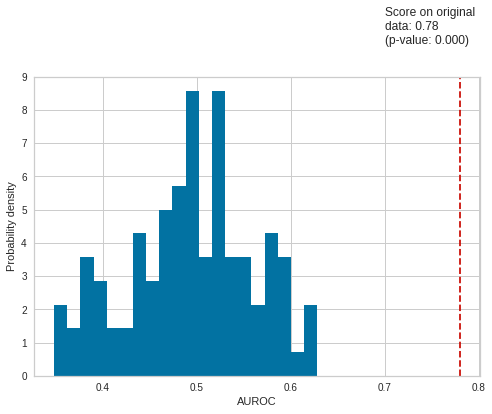

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
score = 0.782; 
#pvalue_iris = np.mean(p_auroc > score)
pvalue = 0.0001
ax.hist(p_auroc, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("AUROC")
_ = ax.set_ylabel("Probability density")

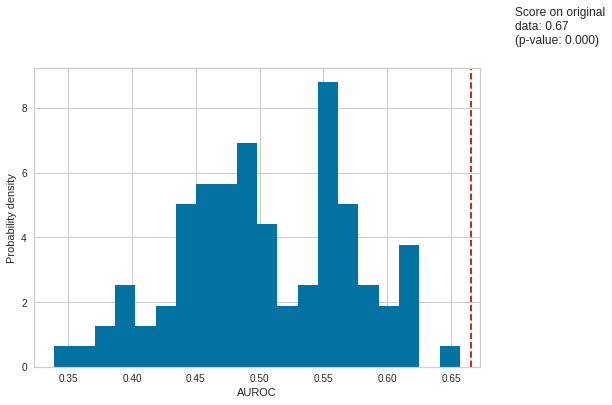

In [78]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
score = 0.666; 
#pvalue_iris = np.mean(p_auroc > score)
pvalue = 0.0001
ax.hist(p_auroc, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("AUROC")
_ = ax.set_ylabel("Probability density")

In [82]:
from sklearn.metrics import *
def print_metrics_with_threshold_tuning(name, X_test,y_test, cols, best_model):
    y_probs = best_model.predict_proba(X_test[cols])[:,1]
    thresholds = arange(0, 1, 0.001).tolist()
    scores = [roc_auc_score(y_test, convert_to_labels(y_probs, t)) for t in thresholds]
    ix = argmax(scores)
    print("Threshold: ", thresholds[ix])
    y_test_predictions = np.where(best_model.predict_proba(X_test[cols])[:,1] > thresholds[ix], 1, 0)
    y_test_predictions=best_model.predict(X_test[cols])
    fp_rate, tp_rate, thresh = roc_curve(y_test, y_probs)
    y_test_predictions = best_model.predict(X_test[cols])
    auc = roc_auc_score(y_test, y_probs)
    sen= sensitivity_score(y_test, y_test_predictions, pos_label=1)
    spe=specificity_score(y_test,y_test_predictions,pos_label=1)
    acc=balanced_accuracy_score(y_test,y_test_predictions)
    mcc=matthews_corrcoef(y_test, y_test_predictions)
    auprc = average_precision_score(y_test, y_test_predictions)
    f1 = f1_score(y_test, y_test_predictions, average="weighted")
    #print(classification_report(y_test, y_test_predictions))
    print("Name: ",name,"Sensitivity: ",np.round(sen,3),", Specificity: ",np.round(spe,3),"AUPRC: ",np.round(auprc,3),", AUROC: ",np.round(auc,3),", MCC: ",np.round(mcc,3)," , F1-weighted: ", np.round(f1,3) )
    return(y_test_predictions, y_probs, np.round(sen,3), np.round(spe,3),np.round(auprc,3), np.round(acc,3), np.round(auc,3), np.round(mcc,3), np.round(f1,3), thresholds[ix])